## Numerical Analysis Homework 6
---
<font size = "3">Student 林之然(B11209005) and 蔡知諺(B11209014), both in department 大氣系 and grade 1.

### Instruction to this Jupyter Notebook:
1. Assign the kernel where you normally run Python.  

2. Click the [全部執行] button or Cell > Run All to execute the entire code. 

3. Look through the codes and discussions.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.collections import LineCollection
#from matplotlib.colors import ListedColormap, BoundaryNorm
import sympy as sym

### 1 Numerical Difference

Given the function $\displaystyle \small f(x) = \frac{(x^2+\sqrt x)cos(x)}{sin(x)}$. We find its symbolic derivative using [SymPy](https://www.sympy.org/en/index.html) (line 4).

In [2]:
x = sym.Symbol('x')
fx = (x**2+x**0.5)*sym.cos(x)/sym.sin(x)
f = sym.lambdify(x,fx,'numpy')
df = sym.lambdify(x,sym.diff(fx),'numpy')

#### 1.1 Find the value of the 1st derivative at  $x = 2$  Use the two-point central difference formula with $x_{x-1} = 1.98$, and $x_{x+1} = 2.02$

First we define the function of two-point central difference formula:  

$\displaystyle \small f'(x) = \frac{f(x_{i+1}-f(x_{i-1}))}{2h}$,  

which $\displaystyle \small h = \frac{x_2-x_1}{2}$.

In [3]:
def df_2c(f,x1,x2):
    '''
    2p CDF at x
    x1 < x < x2
    '''
    df = (f(x2)-f(x1))/(2*(x2-x1)/2)
    return df

Then, we print the value of the 1st derivative using the function above, compare it with the analytical value (by SymPy derivative) and calculate the relative error.

In [4]:
print("# 1.1")
# Two-point central difference at x1 = 1.98, x2 = 2.02
print("Two-point CDF:   ",df_2c(f,1.98,2.02))
# Value of the 1st derivative at x = 2
print("Analytical value:",df(2))
# Relative error
print("Relative error:   ",abs((df_2c(f,1.98,2.02)-df(2))/df(2)))

# 1.1
Two-point CDF:    -8.543510432303862
Analytical value: -8.540659556880616
Relative error:    0.0003338003820733865


As above, we can see that the numerical solution is close to the analytical solution, with error in the order of magnitude [$10^{-4}$].  
Since $h = (x2-x1)/2 = 0.01$, the error corresponds to the truncation error of two-point CDF: $O(h^2) = [0.01^2] = [10^{-4}]$

#### 1.2  Find the value of the 1st derivative at  $x = 2$  Use the four-point central difference formula with $x_{x-2} = 1.96$,  $x_{x-1} = 1.98$,  $x_{x+1} = 2.02$, and $x_{x+2} = 2.04$

First we define the function of four-point central difference formula:  

$\displaystyle \small f'(x_i) = \frac{f(x_{i-2})-8f(x_{i-1})+8f(x_{i+1})-f(x_{i+2})}{12h}$

which $\displaystyle \small h = \frac{x_3-x_2}{2}$.

In [5]:
def df_4c(f,x1,x2,x3,x4):
    '''
    4p CDF at x
    x1<x2<x<x3<x4
    '''
    df = (f(x1)-8*f(x2)+8*f(x3)-f(x4))/(12*(x3-x2)/2)
    return df

Then, we print the value of the 1st derivative using the function above, compare it with the analytical value (by SymPy derivative) and calculate the relative error.

In [6]:
print("# 1.2")
# Four-point central difference formula at (1.96,1.98,2.02,2.04)
print("Four-point CDF:  ",df_4c(f,1.96,1.98,2.02,2.04))
# Still the value of the 1st derivative at x = 2
print("Analytical value:",df(2))
# Relative error
print("Relative error:   ",abs((df_4c(f,1.96,1.98,2.02,2.04)-df(2))/df(2)))

# 1.2
Four-point CDF:   -8.540656176942209
Analytical value: -8.540659556880616
Relative error:    3.9574676696419767e-07


Here we can see that the numerical solution is more close to the analytical solution, with error in the order of magnitude [$10^{-8}$].  
Since $h = (x3-x2)/2 = 0.01$, the error corresponds to the truncation error of four-point CDF: $O(h^4) = [0.01^4] = [10^{-8}]$

### 1.3 Compare the results from 1.1 and 1.2 with the analytical solution

Since we've compared the numerical and analytical solution separately in 1.1 and 1.2, here we sum the result up and get the following two points:  

1. The precise of two methods: Undoubtly, the four-point CDF have a closer result to the analytical solution than the two-point one. Where the error of the latter is 1000 times the error of the former. 
2. The error correspond to the truncation error of the methods we use in the order of magnitude. 

</aside>

| method | value | error (w.r.t Sympy function) |
| --- | --- | --- |
| sympy function | -8.540659556880616 | N/A |
| 2-point | -8.54351043230385 | 0.033380038 % |
| 4-point | -8.540656176942194 | 0.000039575 % |

## 2 Applied Finite Difference in meteorology

### 2.1 Write a function that determines the 1st and 2nd order derivatives of a function that is given by a set of discrete points with equal spacing. All used difference formula should have truncation error $O(h^2)$

Here we define the function for the 1st order derivative by using two-point central difference formula. Because CDF is not applicable at the first and the last point of array, we use three-point forward and backward difference formulae at the beginning and the ending instead. All three formulae have the same truncation error $O(h^2)$. 

Two-point central difference formula:  

$\displaystyle \small f'(x_i) = \frac{f(x_{i+1}-f(x_{i-1}))}{2h}$  

Three-point forward difference formula:  

$\displaystyle \small f'(x_i) = \frac{-3f(x_i)+4f(x_{i+1})-f(x_{i+2})}{2h}$

Three-point backward difference formula:  

$\displaystyle \small f'(x_i) = \frac{f(x_{i-2})-4f(x_{i-1})+3f(x_i)}{2h}$

In [7]:
# 1st derivative
# Two-point central difference
# with 3p Forward at the begin, 3p backward at the end
def dYdX_2c(X,Y):
    dYdX = np.zeros(len(X))
    # 3p Forward
    dYdX[0] = (-3*Y[0]+4*Y[1]-Y[2])/(2*(X[1]-X[0]))
    # 2p Central
    for i in range(1,len(X)-1):
        dYdX[i] = (Y[i+1]-Y[i-1])/(2*(X[i]-X[i-1]))
    # 3p Backward
    dYdX[-1] = (Y[-3]-4*Y[-2]+3*Y[-1])/(2*(X[-1]-X[-2]))
    return dYdX

Then, we define the function for the 2nd order derivative by using three-point central difference formula. Because CDF is not applicable at the first and the last point of array, we use four-point forward and backward difference formulae at the beginning and the ending instead. All three formulae have the same truncation error $O(h^2)$. 

Three-point central difference formula:  

$\displaystyle \small f''(x_i) = \frac{f(x_{i-1})-2f(x_i)+f(x_{i+1})}{h^2}$  

Four-point forward difference formula:  

$\displaystyle \small f''(x_i) = \frac{2f(x_i)-5f(x_{i+1})+4f(x_{i+2})-f(x_{i+3})}{h^2}$

Four-point backward difference formula:  

$\displaystyle \small f''(x_i) = \frac{-f(x_{i-3})+4f(x_{i-2})-5f(x_{i-1})+2f(x_i)}{h^2}$

In [8]:
# 2nd derivative
# Three-point central difference
# with 4p Forward at the begin, 4p backward at the end

def ddYdXX_3c(X,Y):
    ddYdXX = np.zeros(len(X))
    # 4p Forward
    ddYdXX[0] = (2*Y[0]-5*Y[1]+4*Y[2]-Y[3])/((X[1]-X[0])**2)
    # 3p Central
    for i in range(1,len(X)-1):
        ddYdXX[i] = (Y[i-1]-2*Y[i]+Y[i+1])/((X[i]-X[i-1])**2)
    # 4p Backward
    ddYdXX[-1] = ((-Y[-4]+4*Y[-3]-5*Y[-2]+2*Y[-1])/((X[-1]-X[-2])**2))
    return ddYdXX

### 2.2 The altitude of a sounding balloon launched at 0800 LST on November 22, 2020, at Chi-Lan Mountain:

First we import the Time and Height arrays:

In [9]:
Time = np.linspace(0,320,17,dtype=np.float64) # (sec)
Height = np.array([1716.45,1753.47,1791.72,1823.87,1867.08,1895.52,1982.64,2080.91,2198.45,2286.98,2386.01,2460.10,2510.64,2562.53,2619.87,2675.90,2726.54],dtype=np.float64) # (m)

Then, we use the functions in 2.1 to calculate and print the 1st and 2nd derivative of H(T): $\large \frac{dH}{dT}$ and $\large \frac{d^2H}{dT^2}$, along with the array of height in the first place.

In [10]:
print("# 2.2")
print("Height:\n",Height)
dHdT = dYdX_2c(Time,Height)
print("dHdT:\n",dHdT)
ddHdTT = ddYdXX_3c(Time,Height)
print("ddHdTT:\n",ddHdTT)

# 2.2
Height:
 [1716.45 1753.47 1791.72 1823.87 1867.08 1895.52 1982.64 2080.91 2198.45
 2286.98 2386.01 2460.1  2510.64 2562.53 2619.87 2675.9  2726.54]
dHdT:
 [1.82025 1.88175 1.76    1.884   1.79125 2.889   4.63475 5.39525 5.15175
 4.689   4.328   3.11575 2.56075 2.73075 2.83425 2.66675 2.39725]
ddHdTT:
 [ 0.0214    0.003075 -0.01525   0.02765  -0.036925  0.1467    0.027875
  0.048175 -0.072525  0.02625  -0.06235  -0.058875  0.003375  0.013625
 -0.003275 -0.013475 -0.023675]


### Draw the figures

Finally, we draw a figure to show the result of (a) h vs time, (b) velocity vs time, (c) acceleration vs time.

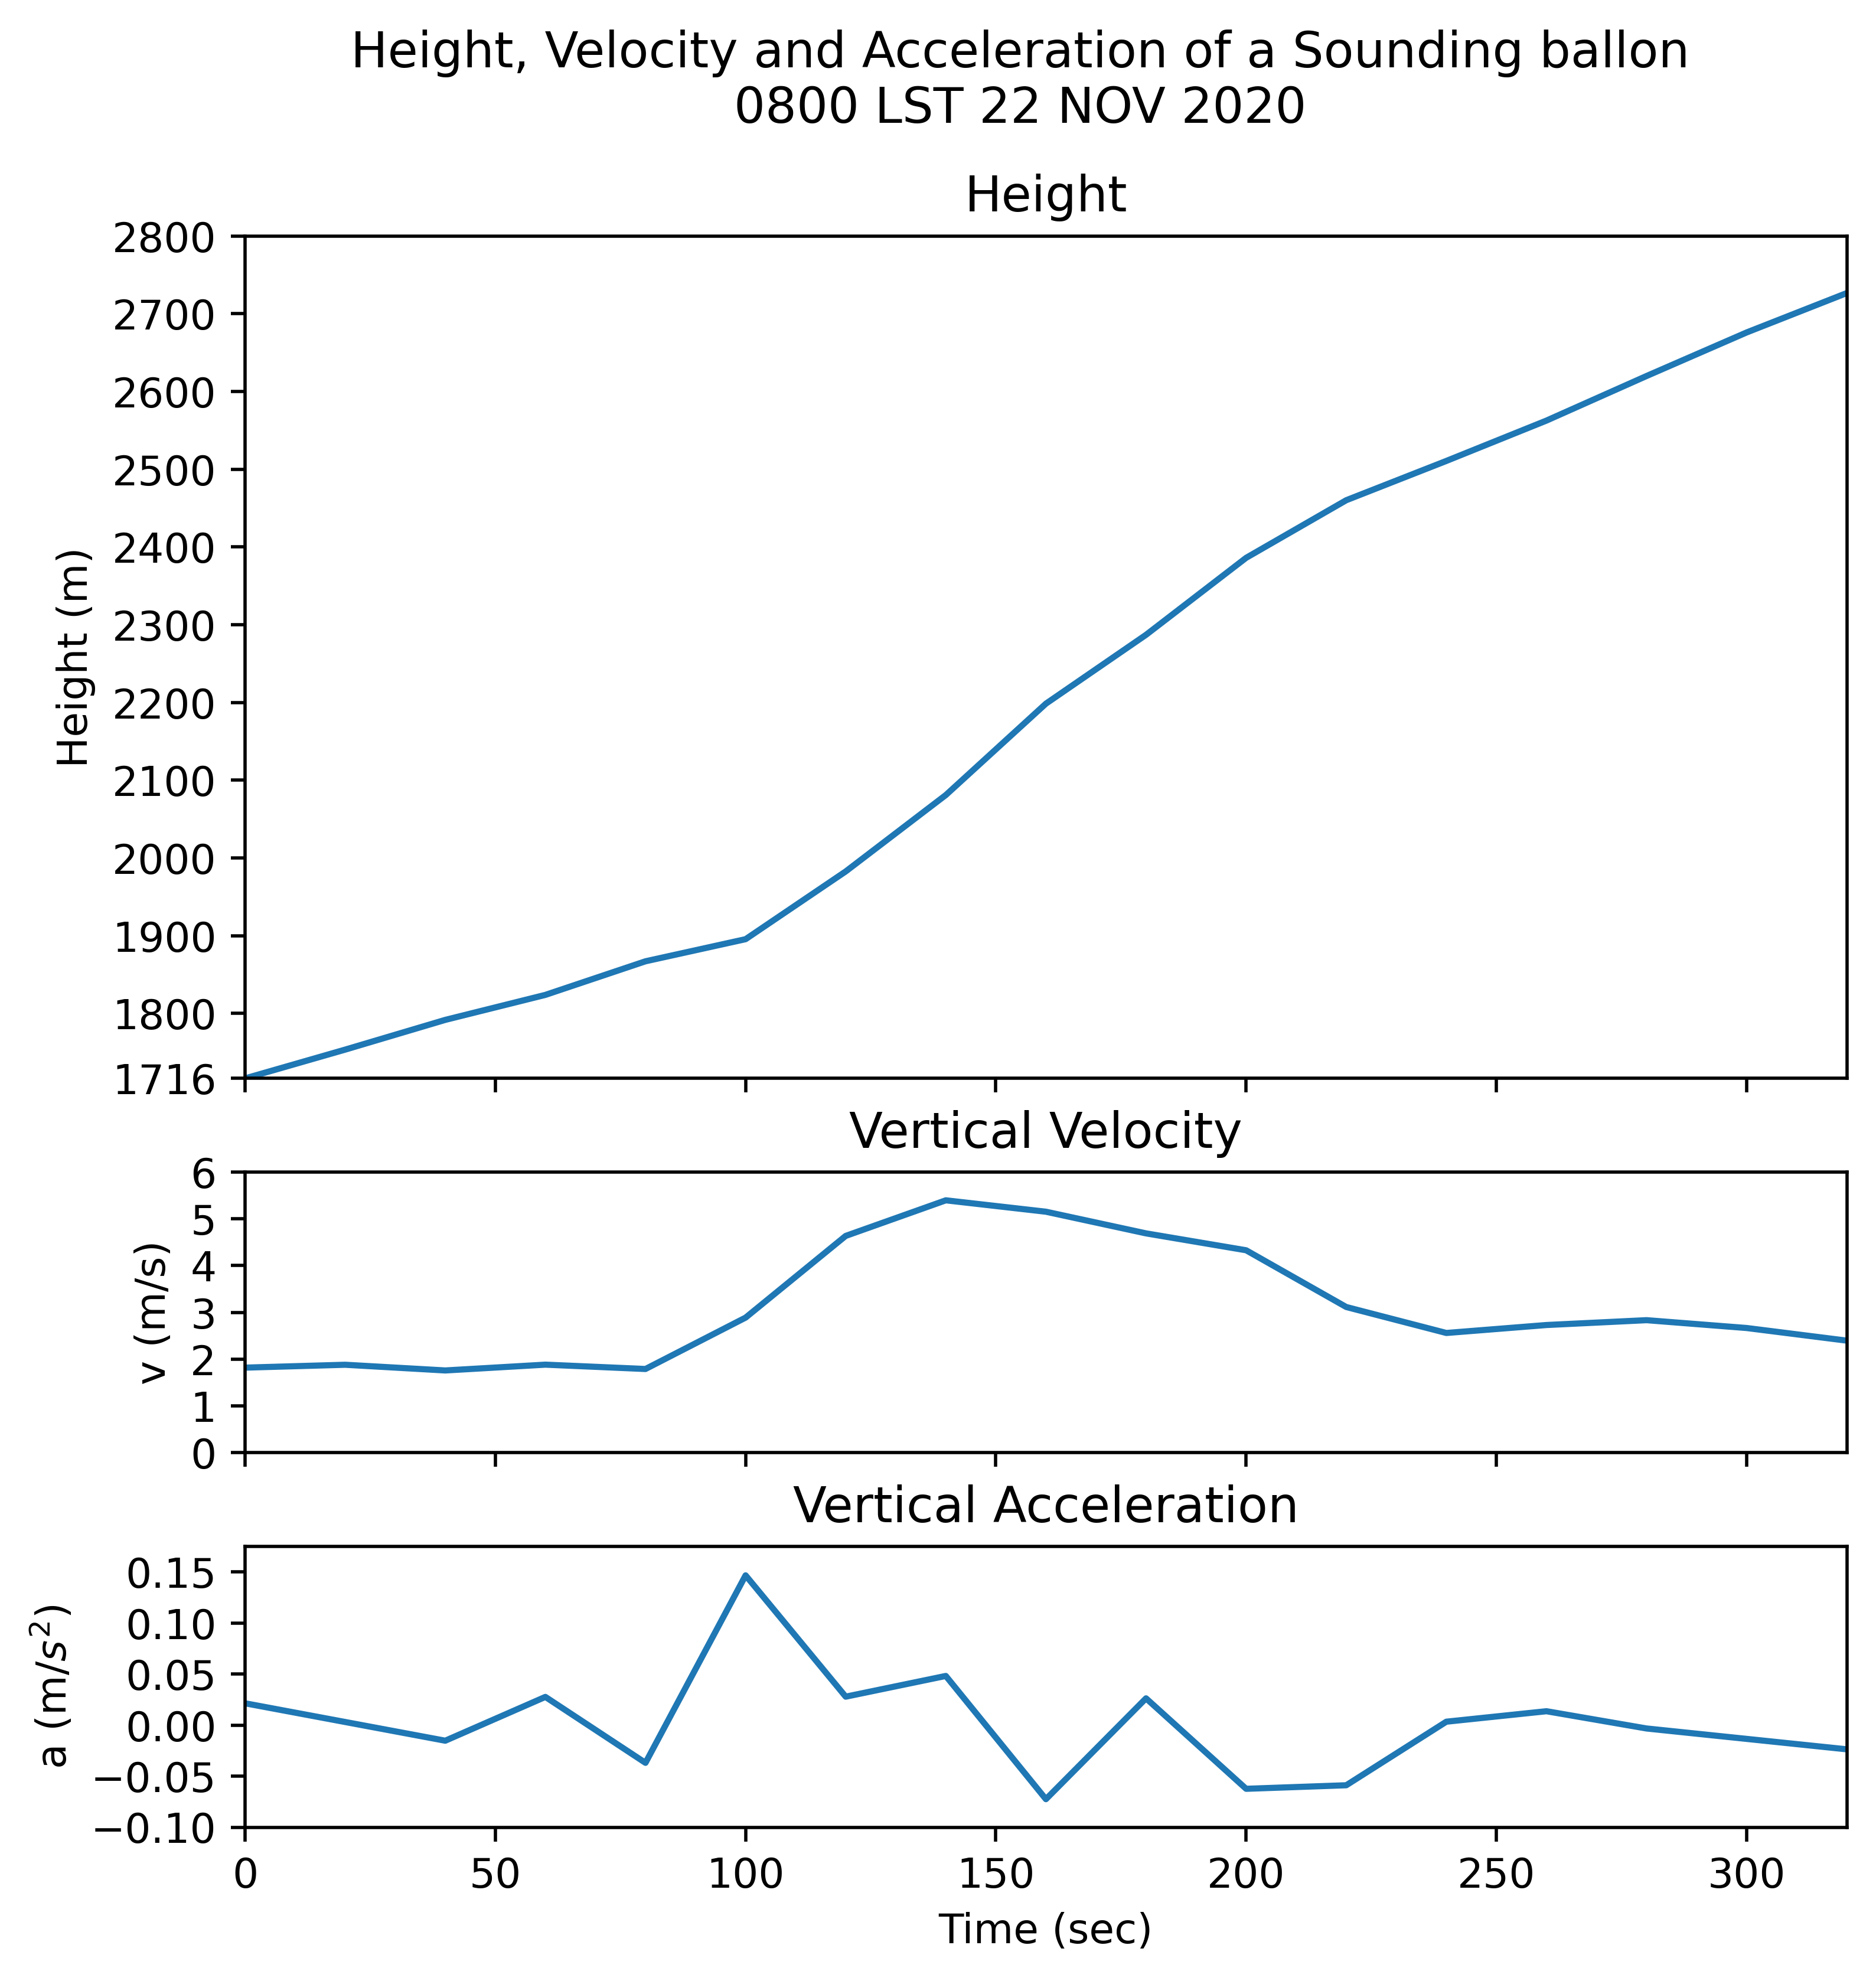

In [11]:
f2,axs = plt.subplots(3,1,sharex=True,height_ratios=(3,1,1),figsize=[7,7],dpi=500)
f2.suptitle("Height, Velocity and Acceleration of a Sounding ballon\n0800 LST 22 NOV 2020")
axs[0].plot(Time,Height)
axs[0].set_ylim(np.min(Height),2800)
axs[0].set_yticks([np.min(Height),1800,1900,2000,2100,2200,2300,2400,2500,2600,2700,2800])
axs[0].set_ylabel("Height (m)")
axs[0].set_title("Height")
axs[1].plot(Time,dHdT)
axs[1].set_ylim(0,6)
axs[1].set_yticks([0,1,2,3,4,5,6])
axs[1].set_ylabel("v (m/s)")
axs[1].set_title("Vertical Velocity")
axs[2].plot(Time,ddHdTT)
axs[2].set_ylim(-0.1,0.175)
axs[2].set_yticks([-0.1,-0.05,0,0.05,0.1,0.15])
axs[2].set_xlim(0,320)
#axs[2].set_xticks(["08:00:00","08:01:00","08:02:00"])
axs[2].set_xlabel("Time (sec)")
axs[2].set_ylabel("a (m/$s^2$)")
axs[2].set_title("Vertical Acceleration")
plt.savefig("hw07_g02.png",dpi=500)

<font size = "3">In this figure, we can observe the change of Height, Velocity and Acceleration of the balloon. Since we don't have other data for comparison, we can only observe the phenomenally change of the balloon during its ascent:  
The ballon start from height 1716 m, which is the release height of the balloon. Its velocity start at around 2 m/s, increasing to its maximum around 5 m/s and decrease to around 3 m/s until the end of the data. This is interesting because the balloon should not slow its vertically velocity unless there's some vertical movement of air. Its acceleration damps a lot. This may due to the lack of data number, which enshapen the curve. Whatsoever, the vertical acceleration of the balloon shows that its net vertical force stays around 0, indicating that the balloon in under similar buoyancy and gravity. 

### Something we've abandoned

In [12]:
'''
points = np.array([Time, Height]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
f2_1,axs = plt.subplots(1,1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(ddHdTT.min(), ddHdTT.max())
lc = LineCollection(segments, cmap='inferno', norm=norm)
# Set the values used for colormapping
lc.set_array(ddHdTT)
lc.set_linewidth(2)
line = axs.add_collection(lc)
f2_1.colorbar(line, ax=axs)
axs.plot(Time,Height)
'''

"\npoints = np.array([Time, Height]).T.reshape(-1, 1, 2)\nsegments = np.concatenate([points[:-1], points[1:]], axis=1)\nf2_1,axs = plt.subplots(1,1)\n# Create a continuous norm to map from data points to colors\nnorm = plt.Normalize(ddHdTT.min(), ddHdTT.max())\nlc = LineCollection(segments, cmap='inferno', norm=norm)\n# Set the values used for colormapping\nlc.set_array(ddHdTT)\nlc.set_linewidth(2)\nline = axs.add_collection(lc)\nf2_1.colorbar(line, ax=axs)\naxs.plot(Time,Height)\n"